# Analiza danych w języku Python - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika. Wyjątek stanowi ostatni z projektów, gdzie po konsultacji z prowadzącym zajęcia możliwa jest większa swoboda w doborze pakietów.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: 43

Członkowie: Dominik Sakłaski, Roksana Jandura, Karolina Murzyn

---

## Zestaw zadań 1: Wulkanizm w holocenie (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import matplotlib.ticker as ticker # do zadania 6 do formatowania liczb

### Wczytanie danych

Poniższy kod wczytuje do zmiennej `eruptions_data` dane z przygotowanego wcześniej pliku eruptions_data.pkl.
Wyświetl przygotowaną tablicę.

In [3]:
eruptions_data = pd.read_pickle("eruption_data.pkl")
eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,2.0,2022,10.0,21.0,2022.0,12.0,19.0,Observations,Reported
22481,Taal,Confirmed,1.0,2022,10.0,5.0,2022.0,10.0,29.0,Observations,Reported
22458,Turrialba,Confirmed,1.0,2022,7.0,17.0,2022.0,7.0,17.0,Observations,Reported
22453,Ulawun,Confirmed,2.0,2022,6.0,2.0,2022.0,6.0,2.0,Observations,Reported
22454,Raung,Confirmed,2.0,2022,5.0,14.0,2022.0,9.0,27.0,Observations,Satellite (infrared)
...,...,...,...,...,...,...,...,...,...,...,...
14556,Tongariro,Confirmed,5.0,-9650,NaN,NaN,NaN,NaN,NaN,Correlation,Tephrochronology
21101,Craters of the Moon,Confirmed,0.0,-10060,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
22141,Igwisi Hills,Confirmed,1.0,-10450,NaN,NaN,NaN,NaN,NaN,Isotopic,Cosmic Ray Exposure


### Zadanie 4: Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

> Indeks: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej.

> Kolumny: 2-poziomowe nagłówki, dla każdego z nagłówków 1 poziomu powtarza się cały zestaw nagłówków 2 poziomu

>> Nagłówki 1 poziomu: All, Confirmed Eruption, Uncertain Eruption </br>
>> Całość danych oraz grupy wyznaczone na podstawie kolumny Eruption category</br>

>> Nagłówki 2 poziomu: f, cf, rf, crf </br>
>> Zliczenia poszczególnych kategorii (ang. frequency, absolute frequency), zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),  rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency), crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency)

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [4]:
# YOUR CODE HERE
#tablica częstości wartości VEI stają się "przedziałami", wartości z Eruption category będą ilścią "wdarzeń liczonych wewnątrz każdej kategorii VEI, 
#funkcją agregującą będzie size takie count(*) w sql
vei_data = eruptions_data.pivot_table(index="VEI", columns="Eruption Category", aggfunc="size")

# kolumna zliczająca wszystkie erupcje, axis=1 sumuje po wierszach
vei_data["All"] = vei_data.sum(axis=1)

#zmiana kolejnosci
vei_data = vei_data.rename(columns={"All":"All eruptions","Confirmed": "Confirmed Eruptions", "Uncertain": "Uncertain Eruptions"})

vei_data = vei_data[[
    ('All eruptions'), ('Confirmed Eruptions'), ('Uncertain Eruptions')
]]

for col in ["All eruptions", "Confirmed Eruptions", "Uncertain Eruptions"]:
    vei_data[f"f_{col}"] = vei_data[col]  
    vei_data[f"cf_{col}"] = vei_data[col].cumsum()  
    vei_data[f"rf_{col}"] = vei_data[col] / vei_data[col].sum()  
    vei_data[f"crf_{col}"] = vei_data[f"rf_{col}"].cumsum() 

vei_data = vei_data.drop(columns=["All eruptions", "Confirmed Eruptions", "Uncertain Eruptions"])

vei_data.columns = pd.MultiIndex.from_tuples(
    [(col.split("_")[1] if "_" in col else col, col.split("_")[0]) for col in vei_data.columns]
)


format_dict = {(col1, col2): '{:.0f}' if col2 in ['f', 'cf'] else '{:.4f}' for col1, col2 in vei_data.columns} # wykorzystanie chata

display(vei_data.style.format(format_dict).format_index(precision=0))

In [5]:
## Komórka testowa
# Test 1: Indeks
assert (vei_data.index.name == 'VEI') == True
assert list(vei_data.index) == [0, 1, 2, 3, 4, 5, 6, 7]
# Test 2: Kolumny
assert len(set(list(vei_data.columns.levels[0])) & set(['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])) == 3
assert set(list(vei_data.columns.levels[1])) == set(['f', 'cf', 'rf', 'crf'])
# Test 3: Wartości w kolumnach f
assert list(vei_data['All eruptions']['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
assert list(vei_data['Confirmed Eruptions']['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
assert list(vei_data['Uncertain Eruptions']['f'].values[:5]) == [204, 157, 264, 19, 1] 
assert np.all(np.isnan(vei_data['Uncertain Eruptions']['f'].values[5:]))

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

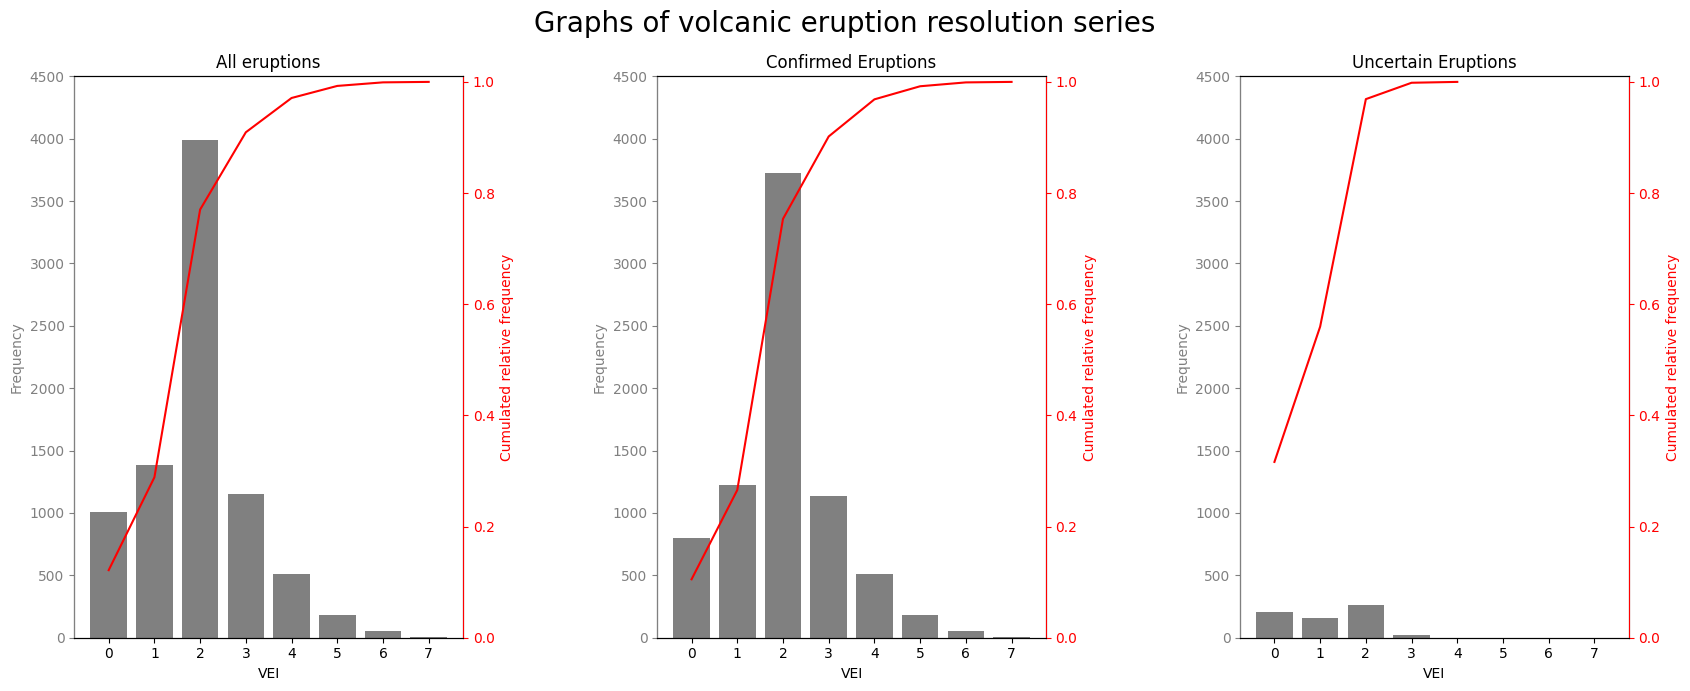

In [6]:
# YOUR CODE HERE
fig, ax = plt.subplots(1, 3, figsize=(17, 7), facecolor="white")

categories_and_titles = ["All eruptions", "Confirmed Eruptions", "Uncertain Eruptions"]

for i, category in enumerate(categories_and_titles):

    ax[i].bar(vei_data.index, vei_data[category].f, color="grey")
    ax[i].set_ylabel("Frequency")
    ax[i].set_ylim([0, 4500])
    ax[i].yaxis.label.set_color('grey')
    ax[i].tick_params(axis='y', colors='grey')
    ax[i].set_xlabel("VEI")
    ax[i].set_xticks(range(0, 8))
    ax[i].set_xlim([-0.75, 7.75])
    ax[i].set_facecolor("white")
    ax[i].set_title(category)
    
    ax_twin = ax[i].twinx()
    ax_twin.plot(vei_data.index, vei_data[category].crf, c="red")
    ax_twin.set_ylabel("Cumulated relative frequency")
    ax_twin.set_ylim([0, 1.01])
    ax_twin.yaxis.label.set_color('red')
    ax_twin.tick_params(axis='y', colors='red')
    ax_twin.spines['left'].set_color('grey')
    ax_twin.spines['right'].set_color('red')


fig.suptitle("Graphs of volcanic eruption resolution series", size=20)
fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

### Zadanie 5: Rodzaje metod wykrywania erupcji [12 pkt]

Przygotuj tablice `evidence_data` zawiarającą informacje o tym ile erupcji o poszczególnych wartościach VEI zostało potwierdzonych przy użyciu poszczególnych metod weryfikacji.
Tablica powinna zawierać następujące elementy:

> Indeks: 2-poziomowe nagłówki </br>

>> Nagłówki 1 poziomu: Kategorie dowodów </br>

>> Nagłówki 2 poziomu: Metody, które dostarczyły dowodów </br>

> Kolumny: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej oraz kolumna "All", w której znajdują się dane dotyczące wszystkich erupcji, bez podziału na VEI.

Wyświetl przygotowane tablicę w taki sposób, aby zawarte w tablicy liczby (w tym wartości VEI w nagłówkach kolumn) wyświetlały się bez miejsc po przecinku.

In [7]:
# YOUR CODE HERE
# rozwiązanie stworzone przy pomocy sztucznej inteligencji 

# Konwertowanie kolumny 'VEI' do liczbowej, obsługa błędów i wypełnienie brakujących wartości zerami
eruptions_data['VEI'] = pd.to_numeric(eruptions_data['VEI'], errors='coerce').fillna(0).astype(int)

# Tworzenie tabeli przestawnej, która grupuje dane według 'Evidence Type' i 'Evidence Method',
# z kolumnami dla każdej wartości VEI, zliczająca wystąpienia dla każdego VEI
evidence_data = eruptions_data.pivot_table(index=['Evidence Type', 'Evidence Method'], 
                                           columns='VEI', 
                                           aggfunc='size', 
                                           fill_value=0)

# Dodawanie kolumny 'All', która zawiera sumę wszystkich erupcji dla każdej pary 'Evidence Type' i 'Evidence Method'
evidence_data['All'] = evidence_data.sum(axis=1)

# Formatowanie danych w tabeli, ustawienie precyzji na 0 miejsc po przecinku dla wszystkich liczb
df_styled = evidence_data.style.format(precision=0)

df_styled

In [8]:
# Test 1 Kształt tablicy
assert evidence_data.shape == (22, 9)
# # Test 2 Kolumny
assert len(set(list(evidence_data.columns)) & set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'])) == 9
# Test 3 Indeks
assert (eruptions_data.index.name == 'Eruption Number') == True
assert len(set(list(evidence_data.index)) & set([('Observations', 'Reported'), ('Observations', 'Satellite (infrared)'), ('Observations', 'Satellite (visual)'),
                                ('Observations', 'Seismicity'), ('Observations', 'Hydrophonic'), ('Observations', 'Photo / Video'), ('Observations', 'Aviation'),
                                ('Uncertain', 'Unspecified'), ('Isotopic', 'Uranium-series'), ('Isotopic', '14C (calibrated)'), ('Isotopic', '14C (uncalibrated)'),
                                ('Isotopic', 'Cosmic Ray Exposure'), ('Isotopic', 'Ar/Ar'), ('Isotopic', 'K/Ar'), ('Correlation', 'Magnetism'), ('Correlation', 'Tephrochronology'),
                                ('Correlation', 'Anthropology'), ('Sidereal', 'Varve Count'), ('Sidereal', 'Dendrochronology'), ('Sidereal', 'Ice Core'), ('Radiogenic', 'Fission track'),
                                ('Radiogenic', 'Thermoluminescence')])) == 22
# Test 4 Kilka losowo wybranych wartości w tablicy
assert evidence_data.loc[('Observations', 'Reported'), 0] == 376
assert evidence_data.loc[('Uncertain', 'Unspecified'), 3] == 22
assert evidence_data.loc[('Sidereal', 'Ice Core'), 7] == 2
assert evidence_data.loc[('Isotopic', '14C (uncalibrated)'), 5] == 41
assert evidence_data.loc[('Correlation', 'Anthropology'), 6] == 0

### Zadanie 6: Wizualizacja rozkładu zarejestrowanych erupcji w czasie [3 pkt]

Korzystając z funkcji `seaborn.stripplot()` zwizualizuj jak rozkładały się w czasie wystąpienia zarejestrowanych erupcji. Do rozróżnienia erupcji w czasie wykorzystaj rok, w którym nastąpił ich początek.

Wyniki zestaw na pojedynczej figurze (siatka wykresów 2x1). Na górnym wykresie przedstaw dane rozróżnione tylko po kątem VEI, a na dolnym wykresie przedstaw dane rozróżnione zarówno po VEI jak i rodzaju dowodu ich wystąpienia (Evidence Type). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- dodaj legendę do dolnego wykresu w taki sposób, aby nie zasłaniała znajdujących nię na nim danych,
- ustaw format wyświetlania wartości VEI bez miejsc po przecinku.

Text(0.5, 0.98, 'Volcanic Explosions Over Time')

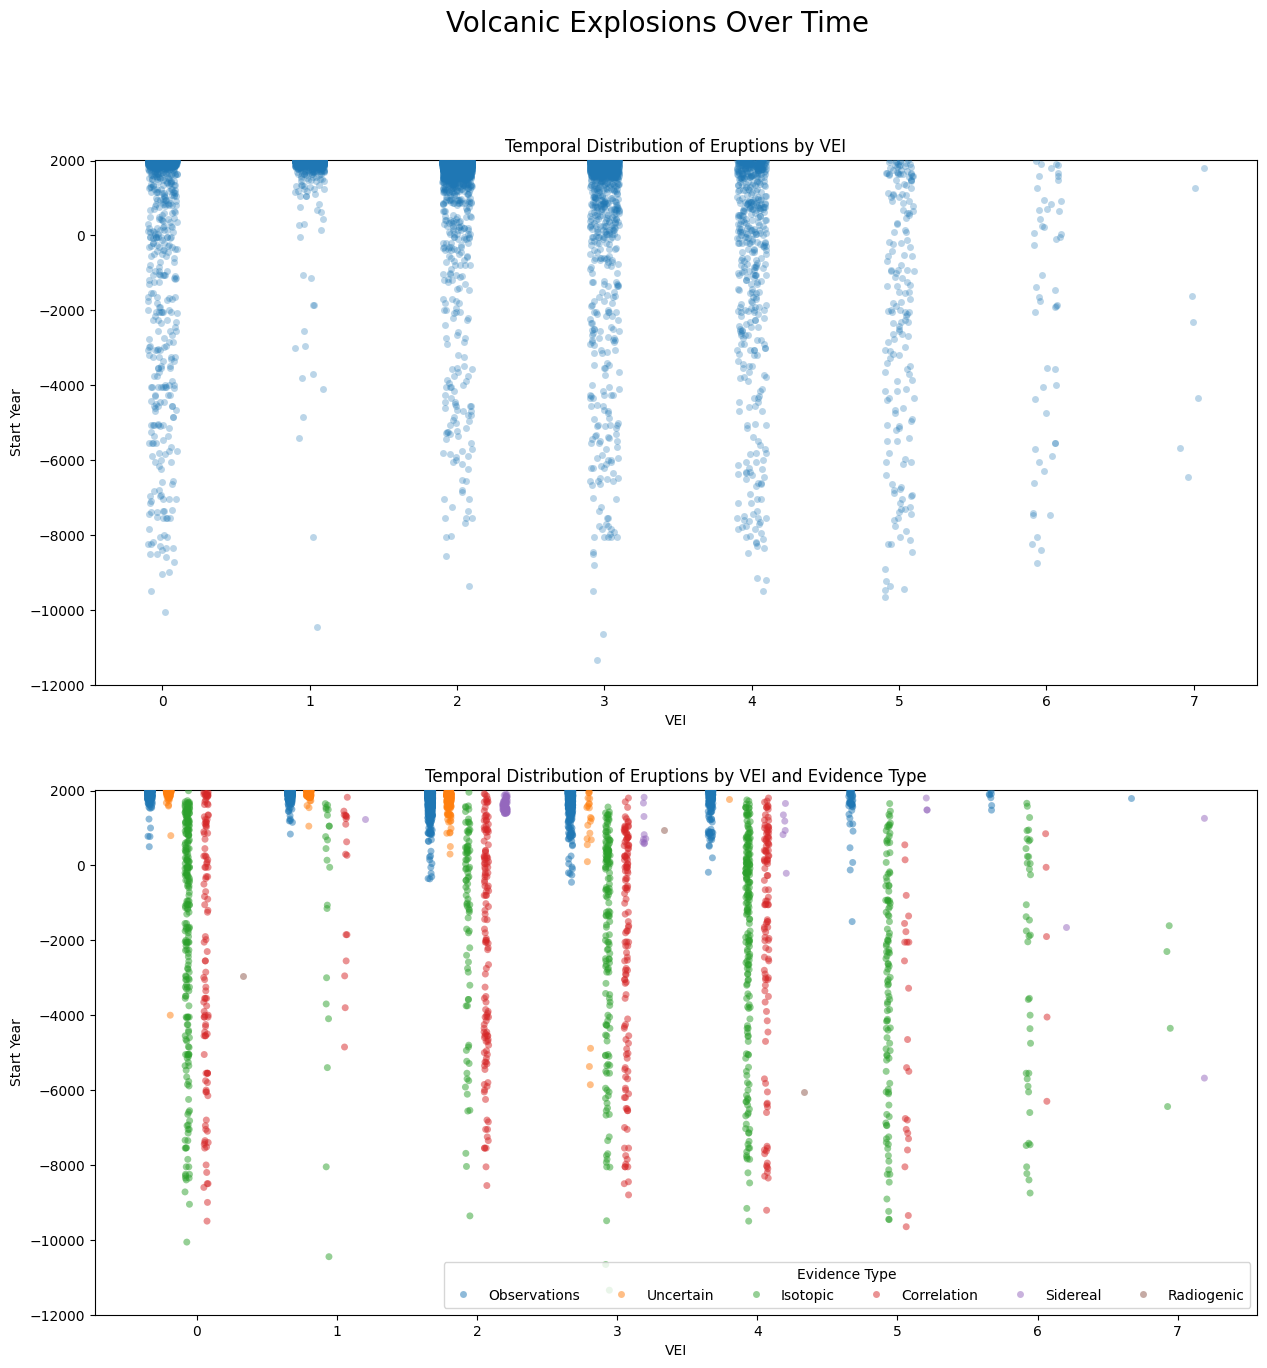

In [9]:
# YOUR CODE HERE
fig, ax = plt.subplots(2,1,figsize=(15,15), facecolor="white")

ax[0].set_facecolor("white")
sns.stripplot(data = eruptions_data, x = "VEI", y = "Start Year", ax = ax[0], alpha = 0.3, native_scale=True)
ax[0].set_title("Temporal Distribution of Eruptions by VEI")
ax[0].set_ylim([-12000,2022])
ax[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d')) #formatowanie wartości VEI bez miejsc po przecinku (chyba nie potrzebne, bo VEI jest już liczbą całkowitą i bez tego poprwnie wypisuje)

ax[1].set_facecolor("white")
sns.stripplot(data = eruptions_data, x = "VEI", y = "Start Year", ax = ax[1], hue="Evidence Type", dodge=True, alpha=0.5, native_scale=True)
ax[1].set_ylim([-12000,2022])
ax[1].set_title("Temporal Distribution of Eruptions by VEI and Evidence Type")
ax[1].legend(title="Evidence Type", loc='lower right',ncol=6)
ax[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d')) #formatowanie wartości VEI bez miejsc po przecinku (chyba nie potrzebne, bo VEI jest już liczbą całkowitą i bez tego poprwnie wypisuje)

fig.suptitle("Volcanic Explosions Over Time", size=20)